#### Relatório de análise de alugueis

In [1]:
import pandas as pd

In [2]:
aluguel = pd.read_csv("dados-brutos/aluguel.csv", sep=";")

In [3]:
aluguel.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [4]:
# Sumário de dados nulos
aluguel.isna().sum()

Tipo              0
Bairro            0
Quartos           0
Vagas             0
Suites            0
Area              0
Valor            17
Condominio     4093
IPTU          10237
dtype: int64

In [5]:
tipo_de_dado = pd.DataFrame(aluguel.dtypes, columns = ["Tipo"])

In [6]:
tipo_de_dado.columns.name = "Campos"

In [7]:
tipo_de_dado

Campos,Tipo
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


### Informações da base de dados

In [8]:
tipo_de_dado = pd.DataFrame(aluguel.dtypes, columns = ["tipos de dados"])

In [9]:
tipo_de_dado.columns.name = "campos"

In [10]:
tipo_de_dado

campos,tipos de dados
Tipo,object
Bairro,object
Quartos,int64
Vagas,int64
Suites,int64
Area,int64
Valor,float64
Condominio,float64
IPTU,float64


In [11]:
# Quantidade de informações na base
aluguel.shape

(32960, 9)

In [12]:
print("A base de dados possui {} registros de imóveis e {} campos".format(aluguel.shape[0], aluguel.shape[1]))

A base de dados possui 32960 registros de imóveis e 9 campos


### Removendo valores repetidos

In [13]:
# Verificando o tipo da variável
tipo = aluguel["Tipo"]
type(tipo)

pandas.core.series.Series

In [14]:
tipo

0                      Quitinete
1                           Casa
2        Conjunto Comercial/Sala
3                    Apartamento
4                    Apartamento
                  ...           
32955                  Quitinete
32956                Apartamento
32957                Apartamento
32958                Apartamento
32959    Conjunto Comercial/Sala
Name: Tipo, Length: 32960, dtype: object

In [15]:
# Removendo dados duplicados
tipo.drop_duplicates(inplace = True)
tipo

0                          Quitinete
1                               Casa
2            Conjunto Comercial/Sala
3                        Apartamento
7                 Casa de Condomínio
16                    Prédio Inteiro
17                              Flat
29                        Loja/Salão
80           Galpão/Depósito/Armazém
83                    Casa Comercial
117                     Casa de Vila
159                   Terreno Padrão
207                      Box/Garagem
347                             Loft
589      Loja Shopping/ Ct Comercial
2157                         Chácara
3354           Loteamento/Condomínio
4379                           Sítio
4721                   Pousada/Chalé
6983                          Studio
9687                           Hotel
23614                      Indústria
Name: Tipo, dtype: object

In [16]:
# Inserindo em um dataframe
tipo = pd.DataFrame(tipo)

In [17]:
tipo

,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
7,Casa de Condomínio
16,Prédio Inteiro
17,Flat
29,Loja/Salão
80,Galpão/Depósito/Armazém
83,Casa Comercial


In [18]:
# Ordenando o index
tipo.index = range(tipo.shape[0])

In [19]:
tipo.columns.name = "Id"

In [20]:
tipo

Id,Tipo
0,Quitinete
1,Casa
2,Conjunto Comercial/Sala
3,Apartamento
4,Casa de Condomínio
5,Prédio Inteiro
6,Flat
7,Loja/Salão
8,Galpão/Depósito/Armazém
9,Casa Comercial


In [21]:
tipo.index

RangeIndex(start=0, stop=22, step=1)

### Imóveis residenciais

In [22]:
list(aluguel["Tipo"].drop_duplicates())

['Quitinete',
 'Casa',
 'Conjunto Comercial/Sala',
 'Apartamento',
 'Casa de Condomínio',
 'Prédio Inteiro',
 'Flat',
 'Loja/Salão',
 'Galpão/Depósito/Armazém',
 'Casa Comercial',
 'Casa de Vila',
 'Terreno Padrão',
 'Box/Garagem',
 'Loft',
 'Loja Shopping/ Ct Comercial',
 'Chácara',
 'Loteamento/Condomínio',
 'Sítio',
 'Pousada/Chalé',
 'Studio',
 'Hotel',
 'Indústria']

In [23]:
residencial = ['Quitinete',
 'Casa',
 'Apartamento',
 'Casa de Condomínio',
 'Casa de Vila',
 ]

In [24]:
residencial

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [25]:
# Series booleana
lista_serie = aluguel["Tipo"].isin(residencial)
lista_serie

0         True
1         True
2        False
3         True
4         True
         ...  
32955     True
32956     True
32957     True
32958     True
32959    False
Name: Tipo, Length: 32960, dtype: bool

In [26]:
imovel_residencial = aluguel[lista_serie]

In [27]:
imovel_residencial.head(10)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
7,Casa de Condomínio,Barra da Tijuca,5,4,5,750,22000.0,NaN,NaN
8,Casa de Condomínio,Ramos,2,2,0,65,1000.0,NaN,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
11,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0


In [28]:
list(imovel_residencial["Tipo"].drop_duplicates())

['Quitinete', 'Casa', 'Apartamento', 'Casa de Condomínio', 'Casa de Vila']

In [29]:
# Quantidade de dados após tratamento
imovel_residencial.shape[0]

22580

In [30]:
# Quantidade de dados geral da base
aluguel.shape[0]

32960

In [31]:
# Dataframe com dados tratados
imovel_residencial.index = range(imovel_residencial.shape[0])

In [32]:
imovel_residencial

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [33]:
# Exportando os dados tratados no dataframe "imovel_residencial" para um arquivo CSV
imovel_residencial.to_csv("../analise-de-alugueis/imoveis-residenciais.csv", sep=";", index = False)

### Seleções e frequências de imóveis

In [34]:
frequencia = pd.read_csv("imoveis-residenciais.csv", sep=";")

In [35]:
frequencia.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [36]:
# Imóveis classificados como apartamento
ap = frequencia["Tipo"] == "Apartamento"

In [37]:
# Dados de apartamento
freq_ap = frequencia[ap].shape[0]
freq_ap

19532

In [38]:
# Imóveis classificados como [casa, casa condominio e casa de vila]
casa = (frequencia["Tipo"] == "Casa") | (frequencia["Tipo"] == "Casa") | (frequencia["Tipo"] == "Casa de Condomínio") | (frequencia["Tipo"] == "Casa de Vila") 

In [39]:
# Dados de casas
freq_casa = frequencia[casa].shape[0]
freq_casa

2212

In [40]:
# Imóveis com área entre 60 à 100 m²
imov_area = (frequencia["Area"] >= 60) & (frequencia["Area"] <= 100)

In [41]:
# Dados de área
resultado_area = frequencia[imov_area].shape[0]
resultado_area

8719

In [42]:
# Imóveis com 4 quartos e aluguel menor que R$ 2000,00
imov_quatro_quartos = (frequencia["Quartos"] >= 4) & (frequencia["Valor"] < 2000.0)

In [43]:
# Dados de imóveis com 4 quartos e aluguel 2k
resultado_imov = frequencia[imov_quatro_quartos].shape[0]
resultado_imov

41

In [44]:
# Relatório de imóveis
print("Cerca de {} mil imóveis são apartamentos".format(freq_ap))
print("Cerca de {} mil imóveis são casas e casas em condomínio e vilas".format(freq_casa))
print("Cerca de {} mil imóveis possui área entre 60 à 100 m²".format(resultado_area))
print("Cerca de {} imóveis possui 4 quartos e valor de aluguel abaixo de R$2000.00".format(resultado_imov))

Cerca de 19532 mil imóveis são apartamentos
Cerca de 2212 mil imóveis são casas e casas em condomínio e vilas
Cerca de 8719 mil imóveis possui área entre 60 à 100 m²
Cerca de 41 imóveis possui 4 quartos e valor de aluguel abaixo de R$2000.00


### Tratamento de dados nulos

In [45]:
frequencia.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
4,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [46]:
# Retorna true para valores nulos 
frequencia.isnull()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True,True
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
22575,False,False,False,False,False,False,False,False,False
22576,False,False,False,False,False,False,False,False,False
22577,False,False,False,False,False,False,False,False,False
22578,False,False,False,False,False,False,False,False,False


In [47]:
# Retorna os valores nulos da coluna valor
frequencia[frequencia["Valor"].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
58,Apartamento,Barra da Tijuca,2,1,1,70,NaN,970.0,68.0
1492,Apartamento,Leme,2,0,0,75,NaN,878.0,NaN
1683,Casa,Campo Grande,3,4,3,363,NaN,NaN,NaN
2012,Apartamento,Botafogo,2,0,0,95,NaN,1010.0,170.0
2034,Apartamento,Copacabana,2,0,0,72,NaN,850.0,NaN
4941,Casa,Campo Grande,3,2,1,100,NaN,NaN,NaN
8568,Apartamento,Leme,2,0,1,75,NaN,878.0,NaN
8947,Apartamento,Glória,3,0,1,135,NaN,910.0,228.0
9149,Apartamento,Gávea,3,1,1,105,NaN,880.0,221.0


In [48]:
# Dropando valores nulos do DataFrame com o métido "dropNA"
A = frequencia.shape[0]
frequencia.dropna(subset = ["Valor"], inplace = True)
B = frequencia.shape[0]
A - B

9

In [49]:
frequencia[frequencia["Valor"].isnull()]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [50]:
# Quantidade de valores na coluna "Condominio"
frequencia[frequencia["Condominio"].isnull()].shape[0]

1813

In [51]:
excluirNull = (frequencia["Tipo"] == "Apartamento") & (frequencia["Condominio"].isnull())

In [52]:
# Quantidade de valores nulos excluídos da coluna "Condominio"
A = frequencia.shape[0]
frequencia = frequencia[~excluirNull] # O ~ inverte o valor booleano
B = frequencia.shape[0]
A - B

745

In [53]:
# Quantidade de valores restantes na coluna "Condominio"
frequencia[frequencia["Condominio"].isnull()].shape[0]

1068

In [54]:
frequencia = frequencia.fillna({"Condominio": 0, "IPTU": 0})

In [55]:
frequencia[frequencia["Condominio"].isnull()].shape[0]

0

In [56]:
frequencia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21826 entries, 0 to 22579
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        21826 non-null  object 
 1   Bairro      21826 non-null  object 
 2   Quartos     21826 non-null  int64  
 3   Vagas       21826 non-null  int64  
 4   Suites      21826 non-null  int64  
 5   Area        21826 non-null  int64  
 6   Valor       21826 non-null  float64
 7   Condominio  21826 non-null  float64
 8   IPTU        21826 non-null  float64
dtypes: float64(3), int64(4), object(2)
memory usage: 1.7+ MB


In [57]:
frequencia.to_csv("imoveis-residenciais.csv", sep=";", index = False)

In [58]:
frequencia.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0


### Adicionando nova colunas

In [59]:
# Nova coluna se baseia na soma das colunas abaixo: (Valor + Condominio + IPTU)
frequencia["Valor Bruto"] = frequencia["Valor"] + frequencia["Condominio"] + frequencia["IPTU"]

In [60]:
frequencia.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0


In [61]:
# Nova coluna se baseia na soma das colunas abaixo: (Valor / Area)
frequencia["Valor Metro²"] = frequencia["Valor"] / frequencia["Area"]

In [62]:
frequencia.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor Metro²
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.500000
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.000000
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.333333
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.666667
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.000000


In [63]:
frequencia["Valor Metro²"] = frequencia["Valor Metro²"].round(2)

In [64]:
# Nova coluna se baseia na soma das colunas abaixo: (Valor Bruto + Area) arredondando com 2 casas decimais
frequencia["Valor bruto Metro²"] = (frequencia["Valor Bruto"] / frequencia["Area"]).round(2)

In [65]:
# Lista com identificação das casas
casa = ["Casa", "Casa de Condominio", "Casa de Vila"]

In [66]:
# Nova coluna se baseia em se a função lambda y estiver contida na lista "casa" retornará casa, caso contrário retornará ap
frequencia["Tipo Customizado"] = frequencia["Tipo"].apply(lambda y: "Casa" if y in casa else "Apartamento")

In [67]:
frequencia

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Bruto,Valor Metro²,Valor bruto Metro²,Tipo Customizado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2260.0,42.50,56.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,70.00,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1210.0,53.33,80.67,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,16.67,21.46,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,1618.0,26.00,32.36,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22575,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,1438.0,12.86,20.54,Apartamento
22576,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,1175.0,29.63,43.52,Apartamento
22577,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,2640.0,23.08,33.85,Apartamento
22578,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,1946.0,29.17,40.54,Apartamento


### Excluindo colunas

In [68]:
frequencia.drop(["Valor Bruto", "Valor bruto Metro²"], axis = 1, inplace = True)

In [69]:
frequencia.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Metro²,Tipo Customizado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
5,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento


In [70]:
frequencia.to_csv("imoveis-residenciais.csv", sep=";", index = False)

In [71]:
# Descobrindo a quantidade de dados de cada tipo da base de dados
frequencia.Tipo.value_counts()

Tipo
Apartamento           18780
Casa de Condomínio      996
Casa                    965
Quitinete               836
Casa de Vila            249
Name: count, dtype: int64

### Criando agrupamentos

In [72]:
frequencia.Bairro.head(20).unique()

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema'], dtype=object)

In [73]:
bairros = ['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema']
selecao = frequencia["Bairro"].isin(bairros)
frequencia = frequencia[selecao]

In [74]:
frequencia["Bairro"].drop_duplicates()

0                  Copacabana
1             Jardim Botânico
2                      Centro
3                Higienópolis
5                    Cachambi
6             Barra da Tijuca
7                       Ramos
9                      Grajaú
10        Lins de Vasconcelos
14                    Taquara
15    Freguesia (Jacarepaguá)
17                     Tijuca
19                     Olaria
21                    Ipanema
Name: Bairro, dtype: object

In [75]:
grupo_de_bairro = frequencia.groupby("Bairro")

In [76]:
type(grupo_de_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [77]:
# Tirando o valor médio do grupo por bairro
for bairro, frequencia in grupo_de_bairro:
    print("{} -> {}".format(bairro, frequencia.Valor.mean()))

Barra da Tijuca -> 7069.552938130986
Cachambi -> 1157.1742424242425
Centro -> 1254.7521865889212
Copacabana -> 4126.677004538578
Freguesia (Jacarepaguá) -> 4966.666666666667
Grajaú -> 2038.6206896551723
Higienópolis -> 1006.25
Ipanema -> 9352.001133786847
Jardim Botânico -> 8722.357414448668
Lins de Vasconcelos -> 1086.1702127659576
Olaria -> 1016.5625
Ramos -> 958.0
Taquara -> 1642.140350877193
Tijuca -> 2043.52


In [78]:
grupo_de_bairro["Valor"].mean().round(2)

Bairro
Barra da Tijuca            7069.55
Cachambi                   1157.17
Centro                     1254.75
Copacabana                 4126.68
Freguesia (Jacarepaguá)    4966.67
Grajaú                     2038.62
Higienópolis               1006.25
Ipanema                    9352.00
Jardim Botânico            8722.36
Lins de Vasconcelos        1086.17
Olaria                     1016.56
Ramos                       958.00
Taquara                    1642.14
Tijuca                     2043.52
Name: Valor, dtype: float64

In [79]:
# DataFrame por média de valor por bairro 
grupo_de_bairro[["Valor", "Condominio"]].mean().round(2)

,Valor,Condominio
Bairro,,
Barra da Tijuca,7069.55,3591.01
Cachambi,1157.17,452.77
Centro,1254.75,422.57
Copacabana,4126.68,1148.68
Freguesia (Jacarepaguá),4966.67,701.47
Grajaú,2038.62,575.02
Higienópolis,1006.25,185.50
Ipanema,9352.00,2244.44
Jardim Botânico,8722.36,1059.24


### Estatística descritiva

In [80]:
grupo_de_bairro["Valor"].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Barra da Tijuca,3863.0,7069.55,11874.15,800.0,2500.0,4500.0,8500.0,600000.0
Cachambi,132.0,1157.17,351.49,600.0,900.0,1100.0,1300.0,2800.0
Centro,343.0,1254.75,884.67,400.0,800.0,1000.0,1400.0,12000.0
Copacabana,2644.0,4126.68,3611.41,100.0,2000.0,3000.0,4800.0,35000.0
Freguesia (Jacarepaguá),456.0,4966.67,45313.69,500.0,1300.0,1700.0,2200.0,800000.0
Grajaú,145.0,2038.62,4901.99,650.0,1250.0,1500.0,1700.0,60000.0
Higienópolis,16.0,1006.25,409.42,700.0,800.0,875.0,1100.0,2400.0
Ipanema,1764.0,9352.00,8219.72,1200.0,4500.0,7000.0,11000.0,90000.0
Jardim Botânico,263.0,8722.36,9332.73,1550.0,3150.0,4000.0,10000.0,50000.0


In [81]:
grupo_de_bairro["Valor"].aggregate(["min", "max", "sum"]).rename(columns ={"min": "minimo", "max": "maximo", "sum": "soma"})

,minimo,maximo,soma
Bairro,,,
Barra da Tijuca,800.0,600000.0,27309683.0
Cachambi,600.0,2800.0,152747.0
Centro,400.0,12000.0,430380.0
Copacabana,100.0,35000.0,10910934.0
Freguesia (Jacarepaguá),500.0,800000.0,2264800.0
Grajaú,650.0,60000.0,295600.0
Higienópolis,700.0,2400.0,16100.0
Ipanema,1200.0,90000.0,16496930.0
Jardim Botânico,1550.0,50000.0,2293980.0


### Visualização de dados

In [182]:
%matplotlib inline
import matplotlib as plt
plt.rcParams['figure.figsize'] = [4.0, 3.0]
plt.rcParams['figure.dpi'] = 80
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 12
plt.rcParams['legend.fontsize'] = 'large'
plt.rcParams['figure.titlesize'] = 'medium'
plt.style.use('classic')

Text(0.5, 1.0, 'Valor médio de alugueis por bairro')

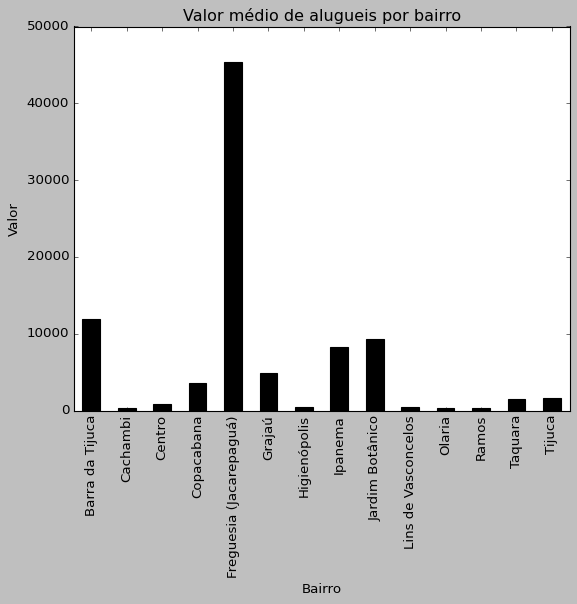

In [183]:
# Gráfico de barras do desvio padrão dos alugueis
grafico = grupo_de_bairro["Valor"].std().plot.bar(color = "black")
grafico.set_ylabel("Valor")
grafico.set_title("Valor médio de alugueis por bairro")


Text(0.5, 1.0, 'Valor máximo de alugueis por bairro')

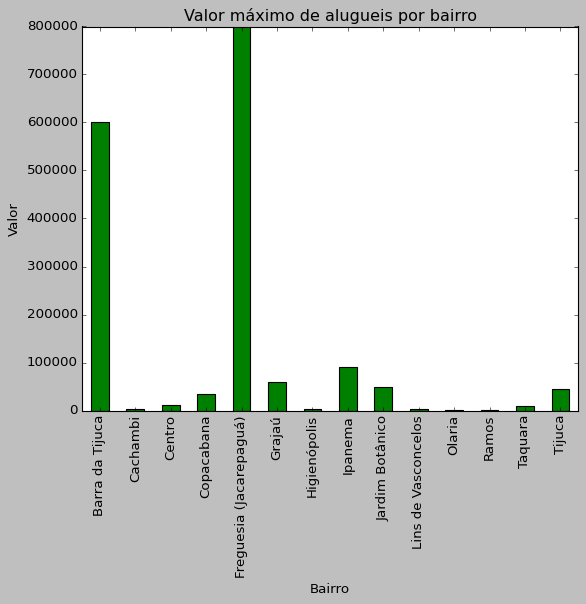

In [184]:
# Gráfico de barras do valor máximo dos alugueis
grafico = grupo_de_bairro["Valor"].max().plot.bar(color = "green")
grafico.set_ylabel("Valor")
grafico.set_title("Valor máximo de alugueis por bairro")

In [85]:
grupo_de_bairro["Condominio"].aggregate(["mean"]).rename(columns ={"mean": "media"})

,media
Bairro,
Barra da Tijuca,3591.013461
Cachambi,452.772727
Centro,422.571429
Copacabana,1148.682300
Freguesia (Jacarepaguá),701.469298
Grajaú,575.020690
Higienópolis,185.500000
Ipanema,2244.442177
Jardim Botânico,1059.243346


Text(0.5, 1.0, 'Valor médio de taxa de condominio por bairro')

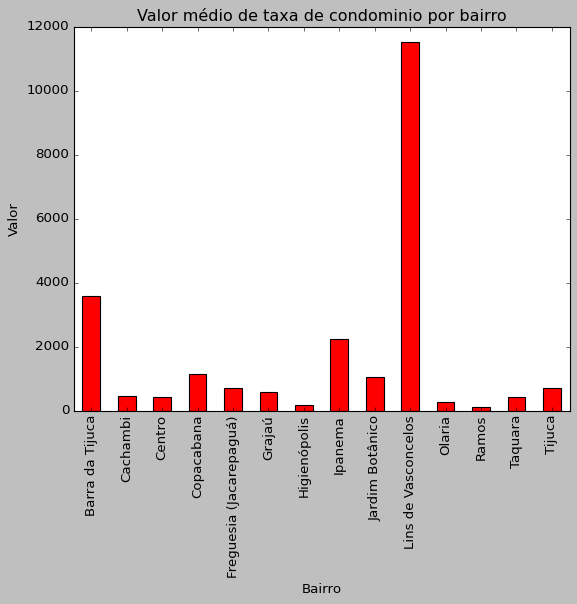

In [185]:
# Gráfico de barras do valor máximo dos alugueis
grafico = grupo_de_bairro["Condominio"].mean().plot.bar(color = "red")
grafico.set_ylabel("Valor")
grafico.set_title("Valor médio de taxa de condominio por bairro")

### Removendo outliers - Boxplot

<Axes: >

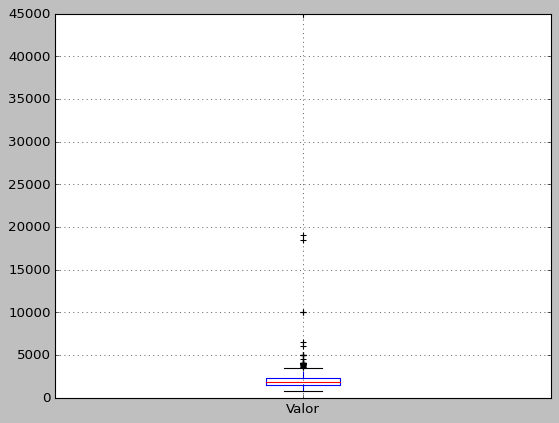

In [186]:
# Box antes do tratamento
frequencia.boxplot(["Valor"])

In [96]:
frequencia[frequencia["Valor"] >= 1000]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor Metro²,Tipo Customizado
17,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0,17.27,Apartamento
20,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,0.0,25.64,Apartamento
84,Apartamento,Tijuca,2,1,0,80,1800.0,1100.0,84.0,22.50,Apartamento
86,Apartamento,Tijuca,3,1,0,172,2700.0,780.0,170.0,15.70,Apartamento
131,Apartamento,Tijuca,3,0,0,87,1600.0,650.0,100.0,18.39,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
22428,Apartamento,Tijuca,2,1,0,78,1800.0,620.0,62.0,23.08,Apartamento
22467,Apartamento,Tijuca,2,0,0,69,1700.0,760.0,62.0,24.64,Apartamento
22483,Apartamento,Tijuca,2,3,0,70,1680.0,230.0,45.0,24.00,Apartamento
22527,Apartamento,Tijuca,3,1,0,75,1900.0,860.0,141.0,25.33,Apartamento


In [105]:
# Series para calcular os quartis
valor = frequencia["Valor"]

In [106]:
# Primeiro quartil
Q1 = valor.quantile(.25)

In [107]:
# Segundo quartil
Q3 = valor.quantile(.75)

In [108]:
IIQ = Q3 - Q1

In [109]:
# Limite inferior e superior
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [111]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_selecao = frequencia[selecao]

<Axes: >

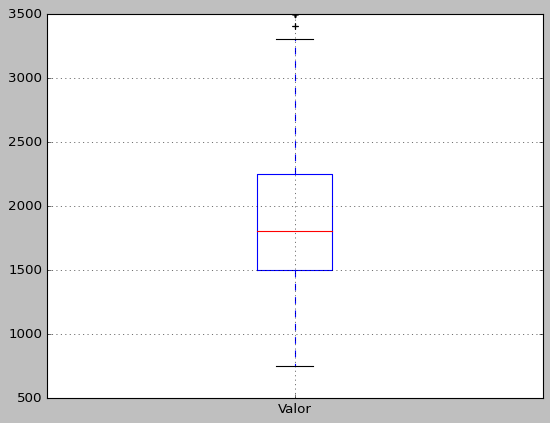

In [187]:
dados_selecao.boxplot(["Valor"])

array([[<Axes: title={'center': 'Valor'}>]], dtype=object)

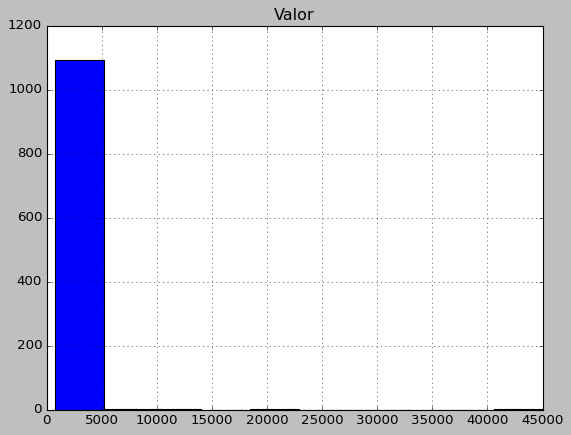

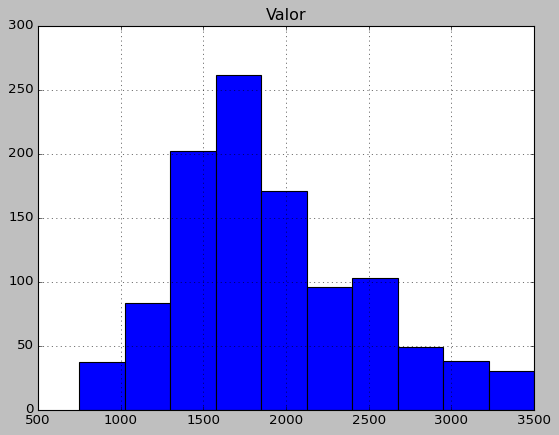

In [188]:
# Visualização no histograma
frequencia.hist(["Valor"])
dados_selecao.hist(["Valor"])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

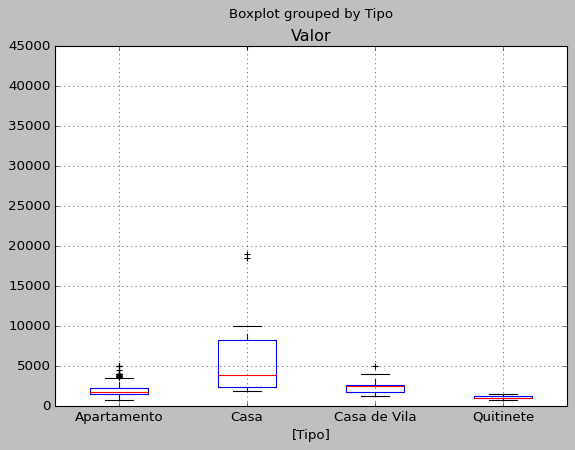

In [189]:
# Identificando e removendo outliers, antes da limpeza
frequencia.boxplot(["Valor"], by = ["Tipo"])

In [124]:
grupo_boxplot_tipo = frequencia.groupby("Tipo")["Valor"]

In [125]:
type(grupo_boxplot_tipo)

pandas.core.groupby.generic.SeriesGroupBy

In [127]:
# Primeiro quartil
Q1 = grupo_boxplot_tipo.quantile(.25)
# Segundo quartil
Q3 = grupo_boxplot_tipo.quantile(.75)
IIQ = Q3 - Q1
# Limite inferior e superior
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [137]:
dados_agrupados = pd.DataFrame()
for tipo in grupo_boxplot_tipo.groups.keys():
    in_dados = frequencia["Tipo"] == tipo
    in_dados_limite = (frequencia["Valor"] >= limite_inferior[tipo]) & (frequencia["Valor"] <= limite_superior[tipo])
    selecao = in_dados & in_dados_limite
    dados_grupo_plot = frequencia[selecao]
    dados_agrupados = pd.concat([dados_agrupados, dados_grupo_plot])

<Axes: title={'center': 'Valor'}, xlabel='[Tipo]'>

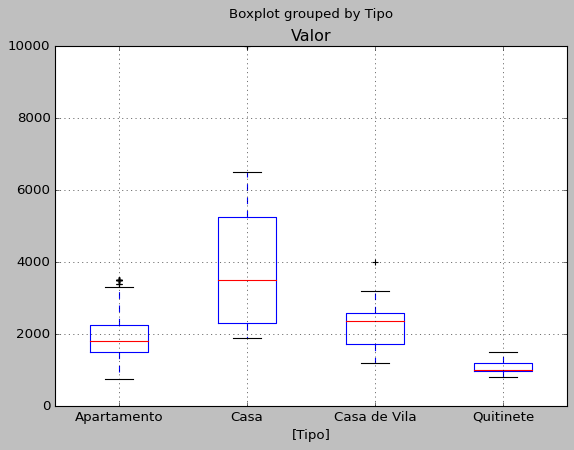

In [191]:
# Identificando e removendo outliers, após da limpeza
dados_agrupados.boxplot(["Valor"], by =  ["Tipo"])